In [1]:
import pandas as pd
import os
import re

In [2]:
folders = os.listdir("ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24")
folders.remove('.DS_Store')
folders

['COMMUNICATIONS_EQUIPMENT',
 'CONSUMER_ELECTRONICS',
 'DATA_PROCESSING',
 'ELECTRONIC_EQUIPMENT',
 'INTERNET_SERVICES',
 'IT_SERVICES',
 'SEMICONDUCTORS',
 'SOFTWARE',
 'TECHNOLOGY_HARDWARE']

In [3]:
all_year_data = pd.DataFrame()

for folder in folders:
    #print(folder)
    # loop through years
    for year in range(2020, 2025):
        #print(year)
        files = os.listdir(f"ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24/{folder}/{year}")
        #print(files)
        # load each file
        for file in files:
            data = pd.read_csv(f"ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24/{folder}/{year}/{file}")
            ticker_name = re.findall('(\w*)_\d{4}\.csv', file)[0]
            data = data.assign(Ticker=ticker_name)
            all_year_data = pd.concat([all_year_data, data])

all_year_data

,Unnamed: 0,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Index,Ticker
0,2020-01-02,205.68,207.235,203.10,204.72,51.1800,624527,0.0,1.0,Communications_Equipment,ANET
1,2020-01-03,200.00,203.830,198.48,200.85,50.2125,766873,0.0,1.0,Communications_Equipment,ANET
2,2020-01-06,198.79,203.170,198.00,202.86,50.7150,516039,0.0,1.0,Communications_Equipment,ANET
3,2020-01-07,202.86,205.430,201.30,204.85,51.2125,532930,0.0,1.0,Communications_Equipment,ANET
4,2020-01-08,204.85,207.790,204.63,206.98,51.7450,673786,0.0,1.0,Communications_Equipment,ANET
...,...,...,...,...,...,...,...,...,...,...,...
161,2024-08-22,64.79,65.490,63.85,64.04,64.0400,3177693,0.0,1.0,Technology_Hardware,WDC
162,2024-08-23,64.25,65.035,63.45,64.35,64.3500,3045446,0.0,1.0,Technology_Hardware,WDC
163,2024-08-26,63.89,64.290,62.43,62.69,62.6900,3247198,0.0,1.0,Technology_Hardware,WDC
164,2024-08-27,61.83,63.100,61.16,62.85,62.8500,5045809,0.0,1.0,Technology_Hardware,WDC


In [4]:
all_year_data['Daily_Change_In_Price'] = (all_year_data['Close'] - all_year_data['Close'].shift(1)) / all_year_data['Close'].shift(1)
all_year_data

,Unnamed: 0,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Index,Ticker,Daily_Change_In_Price
0,2020-01-02,205.68,207.235,203.10,204.72,51.1800,624527,0.0,1.0,Communications_Equipment,ANET,NaN
1,2020-01-03,200.00,203.830,198.48,200.85,50.2125,766873,0.0,1.0,Communications_Equipment,ANET,-0.018904
2,2020-01-06,198.79,203.170,198.00,202.86,50.7150,516039,0.0,1.0,Communications_Equipment,ANET,0.010007
3,2020-01-07,202.86,205.430,201.30,204.85,51.2125,532930,0.0,1.0,Communications_Equipment,ANET,0.009810
4,2020-01-08,204.85,207.790,204.63,206.98,51.7450,673786,0.0,1.0,Communications_Equipment,ANET,0.010398
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024-08-22,64.79,65.490,63.85,64.04,64.0400,3177693,0.0,1.0,Technology_Hardware,WDC,-0.015224
162,2024-08-23,64.25,65.035,63.45,64.35,64.3500,3045446,0.0,1.0,Technology_Hardware,WDC,0.004841
163,2024-08-26,63.89,64.290,62.43,62.69,62.6900,3247198,0.0,1.0,Technology_Hardware,WDC,-0.025796
164,2024-08-27,61.83,63.100,61.16,62.85,62.8500,5045809,0.0,1.0,Technology_Hardware,WDC,0.002552


In [5]:
apple_df = all_year_data[all_year_data["Ticker"]=='AAPL']

In [6]:
apple_df['Daily_Change_In_Price'] = (apple_df['Close'] - apple_df['Close'].shift(1)) / apple_df['Close'].shift(1)

C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\1850363592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Daily_Change_In_Price'] = (apple_df['Close'] - apple_df['Close'].shift(1)) / apple_df['Close'].shift(1)


In [7]:
apple_df['Unnamed: 0'] = pd.to_datetime(apple_df['Unnamed: 0'])
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2344 non-null   datetime64[ns]
 1   Open                   2344 non-null   float64       
 2   High                   2344 non-null   float64       
 3   Low                    2344 non-null   float64       
 4   Close                  2344 non-null   float64       
 5   Adjusted Close         2344 non-null   float64       
 6   Volume                 2344 non-null   int64         
 7   Dividend Amount        2344 non-null   float64       
 8   Split Coefficient      2344 non-null   float64       
 9   Index                  2344 non-null   object        
 10  Ticker                 2344 non-null   object        
 11  Daily_Change_In_Price  2343 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 

C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\3958176686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Unnamed: 0'] = pd.to_datetime(apple_df['Unnamed: 0'])


In [8]:
apple_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)
apple_df = apple_df.sort_values(by='date')
apple_df['MA_5'] = apple_df['Close'].rolling(window=5).mean().shift(1)
apple_df = apple_df.dropna(subset=['MA_5'])


C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\1982251056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)


In [9]:
apple_df['Binary_Returns'] = apple_df['Daily_Change_In_Price'].apply(lambda x: 1 if x > 0 else 0)


In [10]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['Close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['Close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['Close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['Close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['%K'] = (data['Close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

# Applying the indicators to apple_df
calculate_rsi(apple_df)
calculate_ppo(apple_df)
calculate_roc(apple_df)
calculate_williams_r(apple_df)
calculate_stochastic(apple_df)


In [11]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Now when you call all_year_data_with_indicators.head(), it will show all columns
apple_df.head()


,date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Index,Ticker,Daily_Change_In_Price,MA_5,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D
2,2020-01-06,293.79,299.96,292.75,299.80,72.744027,29644644,0.0,1.0,Technology_Hardware,AAPL,0.007968,299.072,1,NaN,0.000000,NaN,NaN,NaN,NaN
3,2020-01-07,299.84,300.90,297.48,298.39,72.401902,27877655,0.0,1.0,Consumer_Electronics,AAPL,-0.004703,298.962,0,NaN,-0.037531,NaN,NaN,NaN,NaN
3,2020-01-07,299.84,300.90,297.48,298.39,72.401902,27877655,0.0,1.0,Technology_Hardware,AAPL,-0.004703,298.570,0,NaN,-0.066529,NaN,NaN,NaN,NaN
4,2020-01-08,297.16,304.44,297.16,303.19,73.566583,33090946,0.0,1.0,Consumer_Electronics,AAPL,0.016086,298.762,1,NaN,0.039290,NaN,NaN,NaN,NaN
4,2020-01-08,297.16,304.44,297.16,303.19,73.566583,33090946,0.0,1.0,Technology_Hardware,AAPL,0.016086,299.914,1,NaN,0.121603,NaN,NaN,NaN,NaN


In [12]:
# Specify the columns to fill
columns_to_fill = ['RSI', 'ROC', 'Williams_%R','%K','%D']

# Fill null values with the mean of each column
apple_df[columns_to_fill] = apple_df[columns_to_fill].fillna(apple_df[columns_to_fill].mean())

In [13]:
X = apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K', '%D']]
y = apple_df["Binary_Returns"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [15]:
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()


In [16]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)



StandardScaler()

In [17]:
# Scale the training data
scaled_df = scaler.transform(X_train)


# KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
# Step 5: Train the KNN model
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


{accuracy}


{0.8675213675213675}

# logisitic regression

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(scaled_df, y_train)

LogisticRegression(random_state=1)

In [21]:
# Make and save testing predictions with the saved logistic regression model using the test data
X_test_scaled = scaler.transform(X_test)
y_pred = log_reg.predict(X_test_scaled)
predictions_df = pd.DataFrame({
    'Predicted': y_pred
})
predictions_df.to_csv('logistic_regression_predictions.csv', index=False)
# Review the predictions
print(y_pred[:10]) 

[1 1 0 1 1 0 1 0 1 1]


In [22]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: 0.86


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(scaled_df, y_train)

RandomForestClassifier(random_state=1)

In [24]:
X_test_scaled = scaler.transform(X_test)
y_pred_rf = rf_clf.predict(X_test_scaled)
predictions_rf_df = pd.DataFrame({
    'Predicted': y_pred_rf
})
predictions_rf_df.to_csv('random_forest_predictions.csv', index=False)

# Review the predictions
predictions_rf_df.head()

,Predicted
0,0
1,1
2,1
3,1
4,1


In [25]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {accuracy_rf:.2f}")
print(rf_clf.score(scaled_df,y_train))

Accuracy score: 0.94
1.0


In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

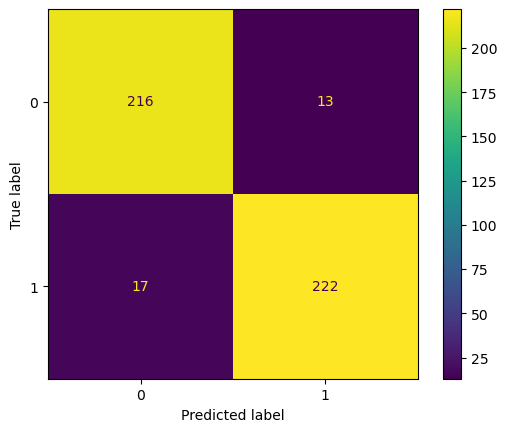

In [27]:
confusion_matrix(y_test,y_pred_rf)
_=ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_scaled, y_test)

In [28]:
ANET_df = all_year_data[all_year_data["Ticker"]=='ANET']

In [29]:
ANET_df['Daily_Change_In_Price'] = (ANET_df['Close'] - ANET_df['Close'].shift(1)) / ANET_df['Close'].shift(1)

C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\1528877967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ANET_df['Daily_Change_In_Price'] = (ANET_df['Close'] - ANET_df['Close'].shift(1)) / ANET_df['Close'].shift(1)


In [30]:
ANET_df['Unnamed: 0'] = pd.to_datetime(ANET_df['Unnamed: 0'])
ANET_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             1172 non-null   datetime64[ns]
 1   Open                   1172 non-null   float64       
 2   High                   1172 non-null   float64       
 3   Low                    1172 non-null   float64       
 4   Close                  1172 non-null   float64       
 5   Adjusted Close         1172 non-null   float64       
 6   Volume                 1172 non-null   int64         
 7   Dividend Amount        1172 non-null   float64       
 8   Split Coefficient      1172 non-null   float64       
 9   Index                  1172 non-null   object        
 10  Ticker                 1172 non-null   object        
 11  Daily_Change_In_Price  1171 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 

C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\2018449423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ANET_df['Unnamed: 0'] = pd.to_datetime(ANET_df['Unnamed: 0'])


In [31]:
ANET_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)
ANET_df = ANET_df.sort_values(by='date')
ANET_df['MA_5'] = ANET_df['Close'].rolling(window=5).mean().shift(1)
ANET_df = ANET_df.dropna(subset=['MA_5'])


C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\2837092371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ANET_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)


In [32]:
ANET_df['Binary_Returns'] = ANET_df['Daily_Change_In_Price'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['Close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['Close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['Close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['Close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['%K'] = (data['Close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

# Applying the indicators to apple_df
calculate_rsi(ANET_df)
calculate_ppo(ANET_df)
calculate_roc(ANET_df)
calculate_williams_r(ANET_df)
calculate_stochastic(ANET_df)

In [34]:
# Specify the columns to fill
columns_to_fill = ['RSI', 'ROC', 'Williams_%R','%K','%D']

# Fill null values with the mean of each column
ANET_df[columns_to_fill] = ANET_df[columns_to_fill].fillna(ANET_df[columns_to_fill].mean())

In [35]:
X = ANET_df[['RSI','PPO', 'ROC','Williams_%R', '%K', '%D']]
y = ANET_df["Binary_Returns"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()

In [38]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [39]:
# Scale the training data
scaled_df = scaler.transform(X_train)

# KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
# Step 5: Train the KNN model
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


{accuracy}

{0.7991452991452992}

# logisitic regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(scaled_df, y_train)

LogisticRegression(random_state=1)

In [42]:
# Make and save testing predictions with the saved logistic regression model using the test data
X_test_scaled = scaler.transform(X_test)
y_pred = log_reg.predict(X_test_scaled)
predictions_df = pd.DataFrame({
    'Predicted': y_pred
})
predictions_df.to_csv('logistic_regression_predictions.csv', index=False)
# Review the predictions
print(y_pred[:10]) 

[0 1 1 1 1 0 0 1 1 0]


In [43]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: 0.85


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(scaled_df, y_train)

RandomForestClassifier(random_state=1)

In [45]:
X_test_scaled = scaler.transform(X_test)
y_pred_rf = rf_clf.predict(X_test_scaled)
predictions_rf_df = pd.DataFrame({
    'Predicted': y_pred_rf
})
predictions_rf_df.to_csv('random_forest_predictions.csv', index=False)

# Review the predictions
predictions_rf_df.head()

,Predicted
0,1
1,1
2,1
3,1
4,1


In [46]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {accuracy_rf:.2f}")
print(rf_clf.score(scaled_df,y_train))

Accuracy score: 0.79
1.0


In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

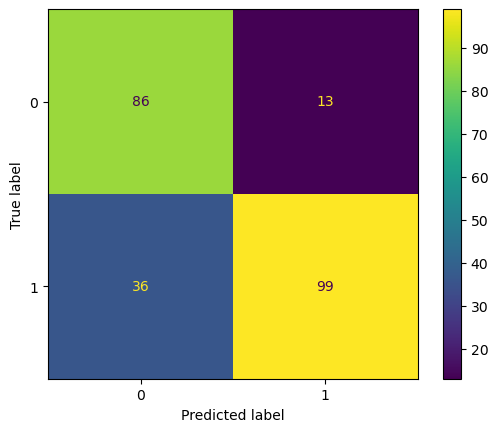

In [48]:
confusion_matrix(y_test,y_pred_rf)
_=ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_scaled, y_test)

In [49]:
all_year_data["Ticker"].unique()

array(['ANET', 'CSCO', 'JNPR', 'AAPL', 'GRMN', 'SNE', 'MA', 'PYPL', 'V',
       'GLW', 'KEYS', 'TEL', 'AKAM', 'AMZN', 'GOOGL', 'ACN', 'CTSH',
       'IBM', 'INFY', 'AMD', 'AVGO', 'INTC', 'NVDA', 'QCOM', 'ADBE',
       'CRM', 'INTU', 'MSFT', 'ORCL', 'DELL', 'HPQ', 'WDC'], dtype=object)

In [50]:
Google_df = all_year_data[all_year_data["Ticker"]=='GOOGL']

In [51]:
Google_df['Daily_Change_In_Price'] = (Google_df['Close'] - Google_df['Close'].shift(1)) / Google_df['Close'].shift(1)

C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\1731062068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google_df['Daily_Change_In_Price'] = (Google_df['Close'] - Google_df['Close'].shift(1)) / Google_df['Close'].shift(1)


In [52]:
Google_df['Unnamed: 0'] = pd.to_datetime(Google_df['Unnamed: 0'])


C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\876040167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google_df['Unnamed: 0'] = pd.to_datetime(Google_df['Unnamed: 0'])


In [53]:
Google_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)
Google_df = Google_df.sort_values(by='date')
Google_df['MA_5'] = Google_df['Close'].rolling(window=5).mean().shift(1)
Google_df = Google_df.dropna(subset=['MA_5'])


C:\Users\ryand\AppData\Local\Temp\ipykernel_9108\2568591987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google_df.rename(columns={"Unnamed: 0": "date"}, inplace=True)


In [54]:
Google_df['Binary_Returns'] = Google_df['Daily_Change_In_Price'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['Close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['Close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['Close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['Close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['High'].rolling(window=lookback).max()
    lowest_low = data['Low'].rolling(window=lookback).min()
    data['%K'] = (data['Close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

# Applying the indicators to apple_df
calculate_rsi(Google_df)
calculate_ppo(Google_df)
calculate_roc(Google_df)
calculate_williams_r(Google_df)
calculate_stochastic(Google_df)

In [56]:
# Specify the columns to fill
columns_to_fill = ['RSI', 'ROC', 'Williams_%R','%K','%D']

# Fill null values with the mean of each column
Google_df[columns_to_fill] = Google_df[columns_to_fill].fillna(Google_df[columns_to_fill].mean())

In [57]:
X = Google_df[['RSI','PPO', 'ROC','Williams_%R', '%K', '%D']]
y = Google_df["Binary_Returns"]

In [58]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()

In [60]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [61]:
# Scale the training data
scaled_df = scaler.transform(X_train)

# KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
# Step 5: Train the KNN model
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


{accuracy}

{0.8376068376068376}

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(scaled_df, y_train)

LogisticRegression(random_state=1)

In [64]:
# Make and save testing predictions with the saved logistic regression model using the test data
X_test_scaled = scaler.transform(X_test)
y_pred = log_reg.predict(X_test_scaled)
predictions_df = pd.DataFrame({
    'Predicted': y_pred
})
predictions_df.to_csv('logistic_regression_predictions.csv', index=False)
# Review the predictions
print(y_pred[:10]) 

[0 1 1 1 0 0 0 1 1 0]


In [65]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: 0.84


# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(scaled_df, y_train)

RandomForestClassifier(random_state=1)

In [67]:
X_test_scaled = scaler.transform(X_test)
y_pred_rf = rf_clf.predict(X_test_scaled)
predictions_rf_df = pd.DataFrame({
    'Predicted': y_pred_rf
})
predictions_rf_df.to_csv('random_forest_predictions.csv', index=False)

# Review the predictions
predictions_rf_df.head()

,Predicted
0,0
1,1
2,1
3,1
4,0


In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: 0.84


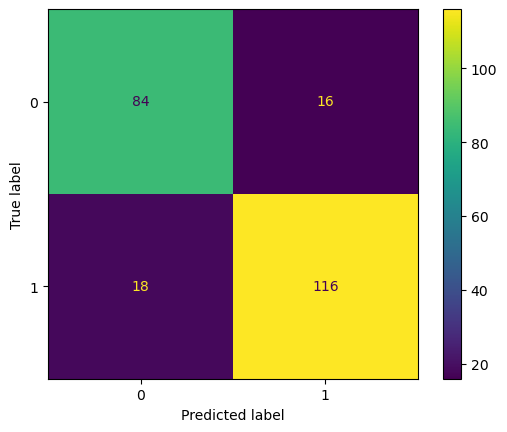

In [69]:
confusion_matrix(y_test,y_pred_rf)
_=ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_scaled, y_test)

In [70]:
# add feature importance chart
# see which features have most weight 
rf_importances = rf_clf.feature_importances_
rf_importances
# Features used in the models (same for all models in this case)
features = ['RSI','PPO', 'ROC','Williams_%R', '%K', '%D']

In [71]:
rf_importances

array([0.10559377, 0.09915811, 0.10264813, 0.22910452, 0.22324149,
       0.24025398])